In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_obs = 600
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
x3 = np.random.uniform(0,10,num_obs)
x4 = np.random.uniform(0,10,num_obs)

const = np.ones(num_obs)
error = np.random.normal(0,.5,num_obs)
b = 1.5
θ1 = 2
θ2 = 5
θ3 = 3
θ4 = 3
y = b*const+ θ1*x1 + θ2*x2 + θ3*x3 + θ4*x4 + error

x_mat = np.array([const,x1,x2,x3,x4]).T

In [3]:
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.41245507, 2.00445674, 4.99601783, 3.00233457, 3.01593519])

In [4]:
learning_rate = 1e-3
num_iter = 1000
theta_initial = np.array([1,2,5,3,3])

In [5]:
true_coef = [b, θ1, θ2, θ3, θ4]

def plot_ij(theta_path, i, j, ax):
    ax.plot(true_coef[i], true_coef[j],
            marker='p', markersize=15, label='true coef', 
            color='#778899')
    ax.plot(theta_path[:, i],theta_path[:, j],
            color='k', linestyle='--', marker='^', 
            markersize=5, markevery=50)
    ax.plot(theta_path[0, i], theta_path[0, j], marker='d', 
            markersize=15, label='start', color='#F08080')
    ax.plot(theta_path[-1, i], theta_path[-1, j], marker='o', 
            markersize=15, label='finish', color='#F08080')
    ax.set(
        xlabel='theta'+str(i),
        ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')
    

def plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 16))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate, 
                         iters=num_iter, initial=theta_initial)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2, 2, 1)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 2)
    plot_ij(theta_path, 0, 2, ax)
    ax = fig.add_subplot(2, 2, 3)
    plot_ij(theta_path, 1, 2, ax)
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(loss_vec)
    ax.set(xlabel='iterations', ylabel='squared loss')
    ax.grid(True)

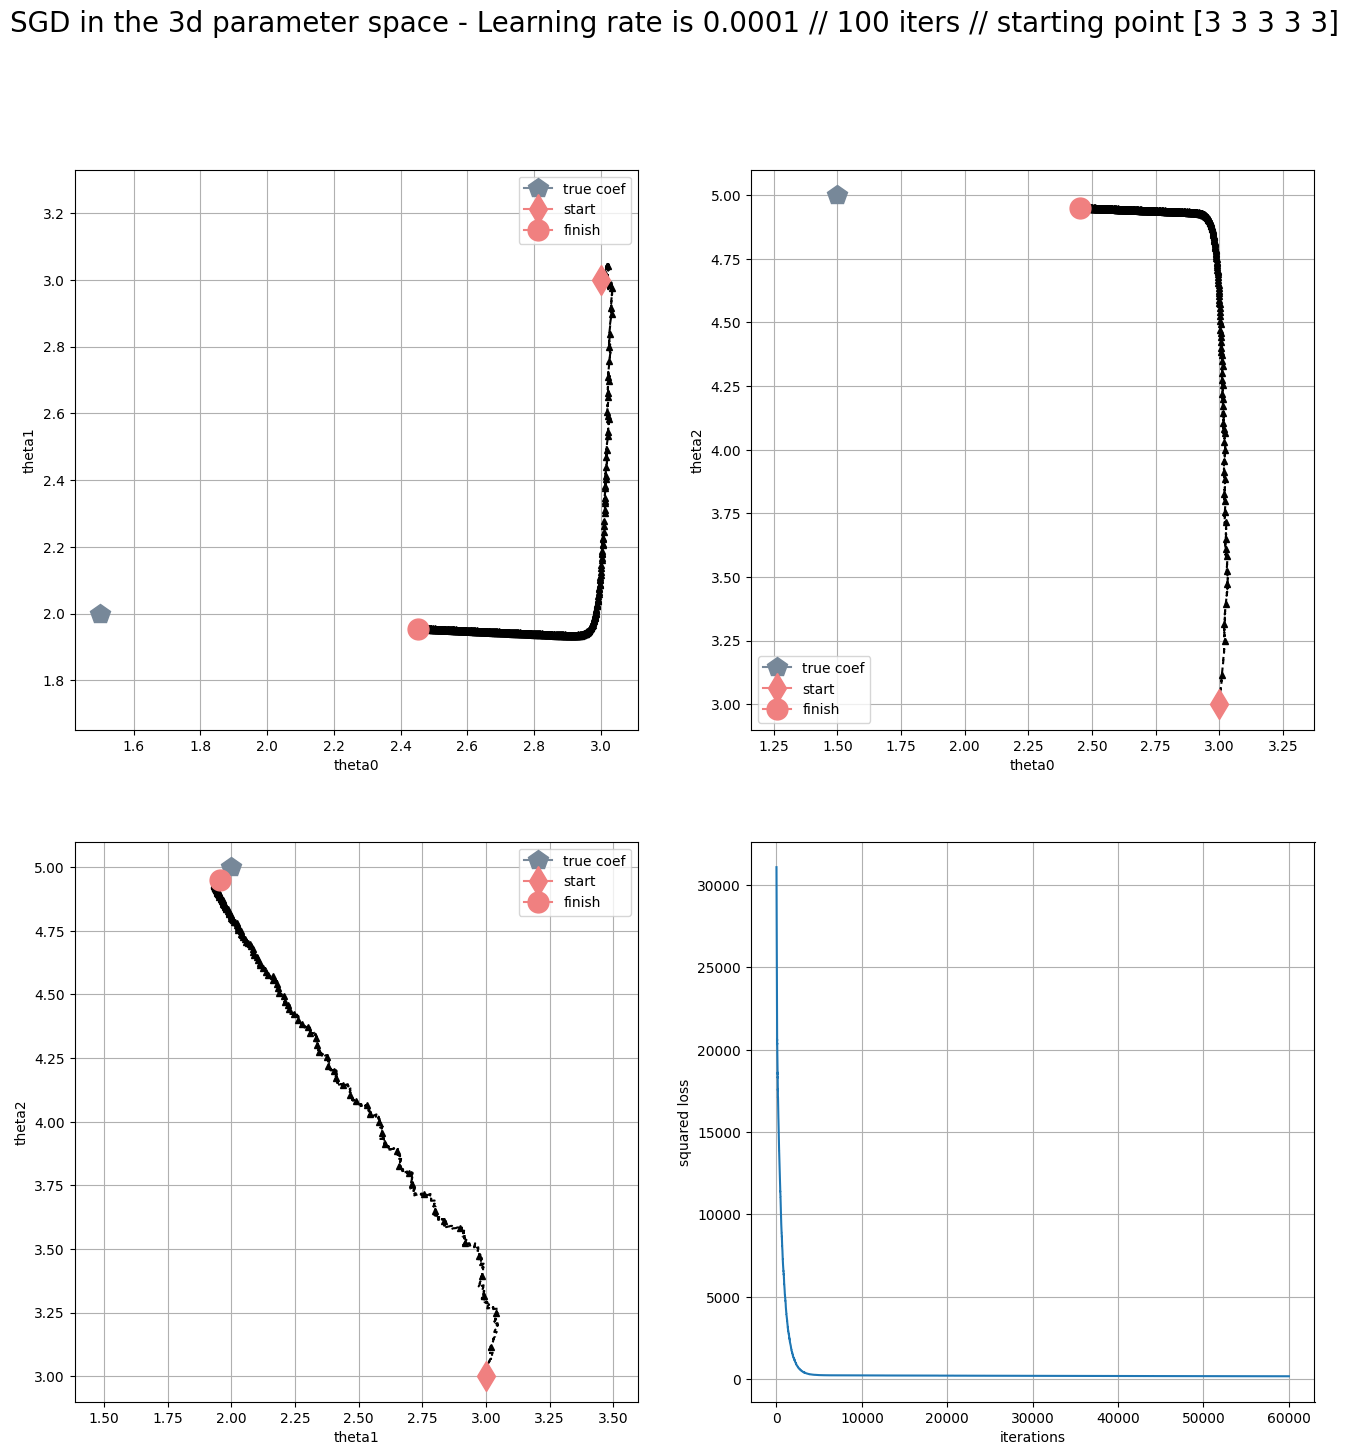

In [6]:
def stochastic_gradient_descent(learning_rate, num_iter, theta_initial):

    theta = theta_initial
    theta_path = np.zeros(((num_iter*num_obs)+1,5))
    theta_path[0,:] = theta_initial
    loss_vec = np.zeros(num_iter*num_obs)

    count = 0
    for i in range(num_iter):
        for j in range(num_obs):
            count+=1
            y_pred = np.dot(theta.T,x_mat.T)
            loss_vec[count-1] = np.sum((y-y_pred)**2)
            grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
            theta = theta + learning_rate*grad_vec
            theta_path[count,:]=theta
    return theta_path, loss_vec

learning_rate = 1e-4
num_iter = 100
theta_initial = np.array([3, 3, 3, 3, 3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)
plot_all(theta_path, loss_vec, learning_rate, 
         num_iter, theta_initial, 'SGD')